## imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# scikit
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import time

/home/pst0004/anaconda3/envs/entornoPrueba/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## carga de datos

In [11]:
#  CARGA DATAFRAME ATRIBUTOS
df_atributos = pd.read_pickle('../pkls/dfAtributosNormalizado_0_dias_2_celdas.pkl')#.drop('Unnamed: 0',axis=1)
df_atributos.head()

,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,mlotst_izq_1_0,zos_izq_1_0,bottomT_izq_1_0,...,so_inf_2.1_10,uo_inf_2.1_10,vo_inf_2.1_10,mlotst_inf_2.2_10,zos_inf_2.2_10,bottomT_inf_2.2_10,thetao_inf_2.2_10,so_inf_2.2_10,uo_inf_2.2_10,vo_inf_2.2_10
0,0.028272,0.484909,0.593375,0.393488,0.753866,0.265495,0.377426,0.044560,0.470527,0.578919,...,0.703526,0.535836,0.402959,0.017508,0.430021,0.320409,0.476941,0.670427,0.524089,0.240149
1,0.028272,0.564889,0.748738,0.600051,0.778454,0.335800,0.493170,0.023834,0.563082,0.792167,...,0.755449,0.484642,0.517160,0.015448,0.558761,0.207604,0.861387,0.755555,0.509988,0.422790
2,0.028272,0.430584,0.701932,0.391888,0.746007,0.418131,0.514019,0.022798,0.425026,0.727978,...,0.682051,0.395904,0.635503,0.003090,0.431624,0.305412,0.452228,0.659829,0.545241,0.567625
3,0.028272,0.425553,0.701025,0.380565,0.747275,0.455134,0.485262,0.022798,0.417787,0.729441,...,0.678205,0.408419,0.634911,0.003090,0.422543,0.300898,0.414153,0.655727,0.508813,0.598509
4,0.028272,0.450201,0.694401,0.550601,0.777440,0.284921,0.498922,0.023834,0.450879,0.802019,...,0.732692,0.439135,0.716568,0.006179,0.476496,0.198927,0.749822,0.719316,0.534665,0.571352


In [10]:
#  CARGA DATAFRAME AVISTAMIENTOS
df_avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')#.drop('Unnamed: 0',axis=1)
df_avistamientos.head()

,Avistamientos
0,1
1,1
2,13
3,23
4,15


In [24]:
# DATAFRAMES A LISTAS
listado_atributos = df_atributos.values.tolist()
listado_avistamientos = df_avistamientos.values.tolist()
# CONJUNTOS DE ENTRENAMIENTO Y TEST
atributos_train, atributos_test, avistamientos_train, avistamientos_test = train_test_split(listado_atributos,listado_avistamientos,test_size=0.2)
atributos_train = np.array(atributos_train)
atributos_test = np.array(atributos_test)
avistamientos_train = np.ravel(np.array(avistamientos_train))
avistamientos_test = np.ravel(np.array(avistamientos_test))
type(avistamientos_train)
avistamientos_train.shape

(534,)

In [10]:
def imprimir(mod,X_test,Y_test,Y_prediccion):
    # COEFICIENTES (pendientes)
    print('Coeficientes:')
    print(mod.coef_)
    print(mod.intercept_)
    # The mean squared error
    print('Error cuadrático medio: %.2f'% mean_squared_error(Y_test, Y_prediccion))
    # The coefficient of determination: 1 is perfect prediction
    print('Coeficiente de determinación con datos test: %.2f'% mod.score(X_test, Y_test)) 
    print('Coeficiente de determinación con datos train: %.2f'% mod.score(atributos_train, avistamientos_train)) 
    print(r2_score(Y_test, Y_prediccion))

    plt.plot(Y_test,'r')
    plt.plot(Y_prediccion,'g')
    plt.show()
    
    # datos que teniamos y los uqe hemos obtenido
    # [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

### Regresion Lineal
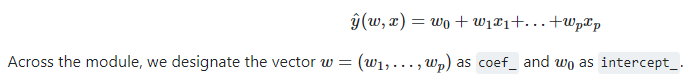

In [6]:
# # REGRESION LINEAL
# lr = linear_model.LinearRegression()
# # se entrena al modelo
# lr.fit(atributos_train,avistamientos_train)
# # prediccion
# avistamientos_prediccion_lineal = lr.predict(atributos_test)

In [7]:
# scores_regr = mean_squared_error(avistamientos_test, avistamientos_prediccion_lineal)
# scores_regr

137964.37608665373

In [1]:
# imprimir(lr,atributos_test,avistamientos_test,avistamientos_prediccion_lineal)

### Polinomial

In [9]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression

# model = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                   ('linear', LinearRegression(fit_intercept=False))])
# model = model.fit(atributos_train,avistamientos_train)

# model.named_steps['linear'].coef_

# avistamientos_pred_pol = model.predict(atributos_test)


KeyboardInterrupt: 

In [ ]:
# print(model.score(atributos_test,avistamientos_test))
# plt.plot(avistamientos_test,'r')
# plt.plot(avistamientos_pred_pol,'g')
# plt.show()

### Random Forest

In [10]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(atributos_train,avistamientos_train)

# avistamientos_prediccion_rf = rf.predict(atributos_test)
# rf.score(atributos_test,avistamientos_test)

0.21058732570110938

In [11]:
# rf = RandomForestRegressor(n_estimators=1000,max_features=3,max_depth=100)
# rf.fit(atributos_train,avistamientos_train)

# avistamientos_prediccion_rf = rf.predict(atributos_test)
# rf.score(atributos_test,avistamientos_test)


0.17793253494897532

In [28]:
## RandomizedSearchCV
inicio = time.time()
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
def forest(atributos_train, avistamientos_trainatributos_test,avistamientos_test,n):
    # define the parameter space that will be searched over
    param_distributions = {'n_estimators': randint(1, 500),
                           'max_depth': randint(1, 100),
                          'max_features': randint(1,atributos_train.shape[1])}

    busqueda = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                                n_iter=n,
                                param_distributions=param_distributions,
                                random_state=0)
    busqueda.fit(atributos_train, avistamientos_train)




    print(busqueda.best_params_)



    # the search object now acts like a normal random forest estimator
    # with max_depth=9 and n_estimators=4
    busqueda.score(atributos_test, avistamientos_test)
    fin= time.time()
    print('tiempo requerido {} minutos'.format((fin-inicio)/60))
    busqueda.best_score_
    return [busqueda.score(atributos_test, avistamientos_test),busqueda.best_params_]


In [14]:
# rf = RandomForestRegressor(n_estimators=183,max_features=1,max_depth=81)
# rf.fit(atributos_train,avistamientos_train)

# avistamientos_prediccion_rf = rf.predict(atributos_test)
# rf.score(atributos_test,avistamientos_test)

0.1684101676121953

In [30]:
# rf = RandomForestRegressor(n_estimators=183,max_features=1,max_depth=81)
# rf.fit(atributos_train,avistamientos_train)

# avistamientos_prediccion_rf = rf.predict(atributos_test)
# print(rf.score(atributos_test,avistamientos_test)
# )
# plt.plot(avistamientos_test,'r')
# plt.plot(avistamientos_prediccion_rf,'g')
# plt.show()

### Vecino más cercano

In [31]:

# neigh = KNeighborsRegressor(n_neighbors=10)
# neigh.fit(atributos_train,avistamientos_train)

# avistamientos_prediccion_vecinos = neigh.predict(atributos_test)
# print(neigh.score(atributos_test,avistamientos_test))

# plt.plot(avistamientos_test,'r')
# plt.plot(avistamientos_prediccion_vecinos,'g')
# plt.show()
# [print('{} - {}'.format(avistamientos_test[i],avistamientos_prediccion_vecinos[i])) for i in range(len(avistamientos_test))]

In [33]:

def vecino(atributos_train, avistamientos_trainatributos_test,avistamientos_test,n):
    k_range=list(range(1,atributos_train.shape[1]))
    # options=['uniform', 'distance']

    #specify "parameter distribution" rather than "parameter grid"
    param_grid=dict(n_neighbors=k_range)

    knn=KNeighborsRegressor()
    # rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand = RandomizedSearchCV(knn, param_grid, n_iter=n, random_state=1)
    rand.fit(atributos_train,avistamientos_train)
    return[rand.score(atributos_test, avistamientos_test),rand.best_params_]

### SVM

-0.07139607682780325


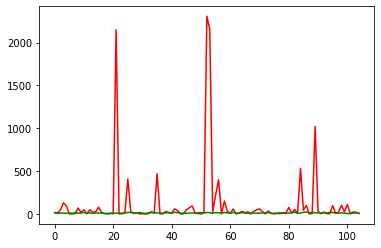

In [56]:
from sklearn import svm
def svm(atributos_train, avistamientos_trainatributos_test,avistamientos_test,n):
    svm_reg = svm.SVR()
    svm_reg.fit(atributos_train,avistamientos_train)

    avistamientos_prediccion_svm = svm_reg.predict(atributos_test)
    print(svm_reg.score(atributos_test,avistamientos_test))

#     plt.plot(avistamientos_test,'r')
#     plt.plot(avistamientos_prediccion_svm,'g')
#     plt.show()

### arboles de decision

-0.7325404683300718


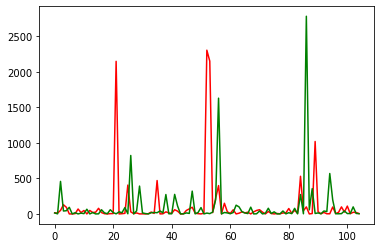

In [57]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth= 50 )

dectree.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_dectree = dectree.predict(atributos_test)
print(dectree.score(atributos_test,avistamientos_test))

plt.plot(avistamientos_test,'r')
plt.plot(avistamientos_prediccion_dectree,'g')
plt.show()

In [27]:
# df para guardar resultados
algoritmos  = ['random_forest','nearest_neighbor','nearest_neighbor_grid',
               'SVR','SVR_grid','arbol_decision', 'arbol_decision_grid',
               'MLP','Boosting','ensembles']
df = pd.DataFrame(index=algoritmos)
df.to_pickle('resultados_normales.pkl')

def reinicia_df():
    df = pd.DataFrame(index=algoritmos)
    df.to_pickle('resultados_normales.pkl')

def guarda_resultado(alg,dias,celdas,split,resultado,params):
    df = pd.read_pickle('resultados_normales.pkl')
    print(alg,dias,celdas,resultado,params)
    nombre_col = '{}_dias_{}_celdas_{}_splits'.format(dias,celdas,split)
    if not nombre_col in df.columns:
        df[nombre_col] = np.nan
        df[nombre_col + '_params'] = np.nan
    df.loc[alg,nombre_col] = resultado
    df.loc[alg,nombre_col + '_params'] = params
    df.to_pickle('resultados_normales.pkl')
    
guarda_resultado('random_forest',1,2,0,3,'hola')
guarda_resultado('nearest_neighbor',1,2,0,4,'adios')
guarda_resultado('SVR',2,2,0,4,'salu2')
df 

random_forest 1 2 3 hola
nearest_neighbor 1 2 4 adios
SVR 2 2 4 salu2


""
random_forest
nearest_neighbor
nearest_neighbor_grid
SVR
SVR_grid
arbol_decision
arbol_decision_grid
MLP
Boosting
ensembles


In [ ]:
import os
from sklearn.model_selection import TimeSeriesSplit
import datetime

splits = [2,5,10]

res = ''
reinicia_df()
avistamientos = pd.read_pickle('../pkls/dfAvistamientos.pkl')
resultado = np.ravel(df_avistamientos)

listado_archivos = os.listdir('../pkls/')
df = pd.DataFrame(index=algoritmos)
for i in listado_archivos:
        if 'dfAtributosNormalizado' in i :
            atributos = pd.read_pickle('../pkls/{}'.format(i))
            n_iter = 1
            print('\n\n' + i + '\n', flush=True)

            # concateno y guardo en log
            res += str(datetime.datetime.now()) + ' --------- ' +  str(i) + '\n'

            model_result = forest(atributos,resultado,n_iter,tscv)
            guarda_resultado('random_forest',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> Random Forest ' + str(model_result) + '\n'

            model_result = vecino(atributos,resultado,n_iter,tscv)
            guarda_resultado('nearest_neighbor',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> Vecino mas cercano ' + str(model_result) + '\n'

            model_result = vecino_grid(atributos,resultado,n_iter,tscv)
            guarda_resultado('nearest_neighbor_grid',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> Vecino mas cercano gridSearch ' + str(model_result) + '\n'

            model_result = SVR(atributos,resultado,n_iter,tscv)
            guarda_resultado('SVR',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> SVR ' + str(model_result) + '\n'

            model_result = SVR_grid(atributos,resultado,n_iter,tscv)
            guarda_resultado('SVR_grid',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> SVR_grid ' + str(model_result) + '\n'

            model_result = arbol_decision(atributos,resultado,n_iter,tscv)
            guarda_resultado('arbol_decision',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> arbol_decision ' + str(model_result) + '\n'

            model_result = arbol_decision_grid(atributos,resultado,n_iter,tscv)
            guarda_resultado('arbol_decision_grid',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> arbol_decision_grid ' + str(model_result) + '\n'
            
            model_result = boosting(atributos,resultado,n_iter,tscv)
            guarda_resultado('Boosting',dias,celdas,split,model_result[2],str(model_result[1]))
            res += '--> Boosting ' + str(model_result) + '\n'

        f = open ('log.txt','wb')

        f.write(bytes(res, encoding='utf-8'))
        f.close()

In [23]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import datasets, ensemble
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = atributos_train, atributos_test, avistamientos_train, avistamientos_test

# params = {'n_estimators': 500,
#           'max_depth': 4,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}

# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(X_train, y_train)

# mse = mean_squared_error(y_test, reg.predict(X_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

# feature_importance = reg.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# fig = plt.figure(figsize=(50, 20))
# plt.subplot(1, 2, 1)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(df_atributos.columns)[sorted_idx])
# plt.title('Feature Importance (MDI)')

# result = permutation_importance(reg, X_test, y_test, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()
# plt.subplot(1, 2, 2)
# plt.boxplot(result.importances[sorted_idx].T,
#             vert=False, labels=np.array(df_atributos.columns)[sorted_idx])
# plt.title("Permutation Importance (test set)")
# fig.tight_layout()
# plt.show()

In [25]:
# df_atributos.columns
# result.importances
# labels=np.array(df_atributos.columns)[sorted_idx]
# labels